# AirBnB Sydney Data Exploration Project
- Name : Rivindu Nethmin Bandara, MENIK HITIHAMY MUDIYANSELAGE
- github@ : rivindubandara

This project involves analysing datasets from AirBnB and in particular looking at the Sydney AirBnB listings and comparing them to New York City's AirBnB listings. My analysis involes looking at price variations between key areas and determining hotspots for AirBnBers.

### A map of Sydneys Local Government Areas and New York Cities Boroughs 
![map of sydney](sydney_lgas.png)
![map of nyc](nyc_boroughs.jpg)

In [3]:
# importing libraries
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import json as js
import csv
import folium
from folium.plugins import MarkerCluster
from folium import plugins

## Loading the Data
I got both datasets from the [Inside AirBnB website] (http://insideairbnb.com/get-the-data.html) which provides the latest airbnb datasets for a number of locations worldwide

In [4]:
# loading file from the directory and storing it
filepath = "listings_syd.csv"
syd = pd.read_csv(filepath)

In [5]:
# loading data from new york city for comparisons later on
filepath = 'AB_NYC_2019.csv'
nyc = pd.read_csv(filepath)

## Examining the Data

In [6]:
# Glancing over the first few listings
syd.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,Central Business District,Sydney,-33.86917,151.22656,Private room,64,2,196,13/03/2020,1.53,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,Central Business District,Sydney,-33.86515,151.19190,Private room,14314,2,526,22/09/2019,4.37,2,0
2,14250,Manly Harbour House,55948,Heidi,Northern Beaches,Manly,-33.80093,151.26172,Entire home/apt,471,5,2,2/01/2019,0.04,2,173
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,Central Business District,Sydney,-33.87888,151.21439,Entire home/apt,130,3,76,3/01/2020,0.65,1,0
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,Lower North,Mosman,-33.81927,151.23652,Entire home/apt,140,2,280,23/04/2020,2.43,1,267


In [7]:
# Looking at the data columns
syd.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Checking for irregularities

In [8]:
# Checking for null values
syd.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             7
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10273
reviews_per_month                 10273
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Remvoing unneccesary data

In [9]:
# Removing unneccesary columns
syd.drop(['name','host_name','last_review','calculated_host_listings_count','number_of_reviews','host_id'], axis=1, inplace=True)
syd['reviews_per_month'].fillna(0,inplace=True)

## Neighbourhood & Local Government Area (LGA) Analysis

Text(0.5, 1.0, 'Listings by Neighbourhood Groups - Sydney')

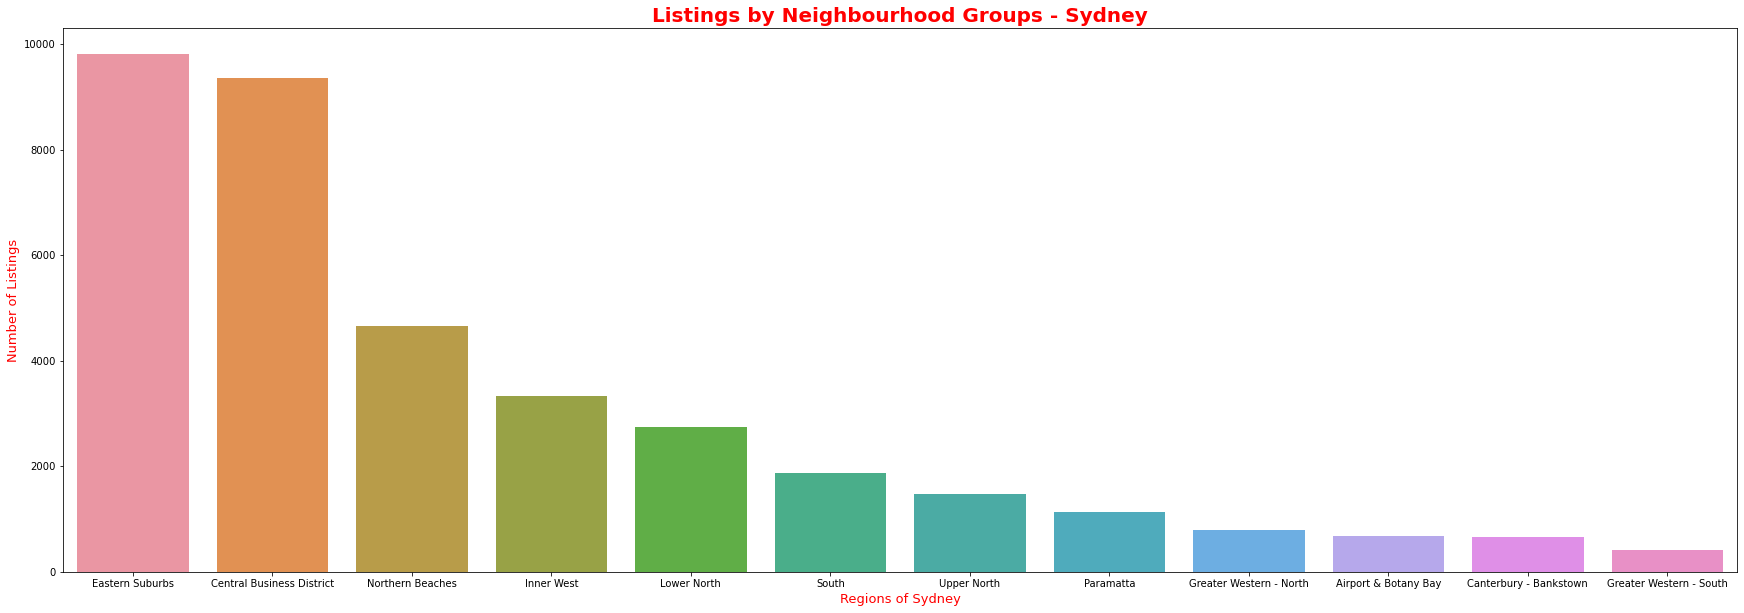

In [10]:
lga_analysis = sns.countplot(syd['neighbourhood_group'], order=syd['neighbourhood_group'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(30, 10)
plt.xlabel("Regions of Sydney",color='r',fontsize=13)
plt.ylabel("Number of Listings",color='r',fontsize=13)
plt.title('Listings by Neighbourhood Groups - Sydney',color='r',fontsize='20',fontweight='bold')

Text(0.5, 1.0, 'Listings by Neighbourhood Groups - NYC')

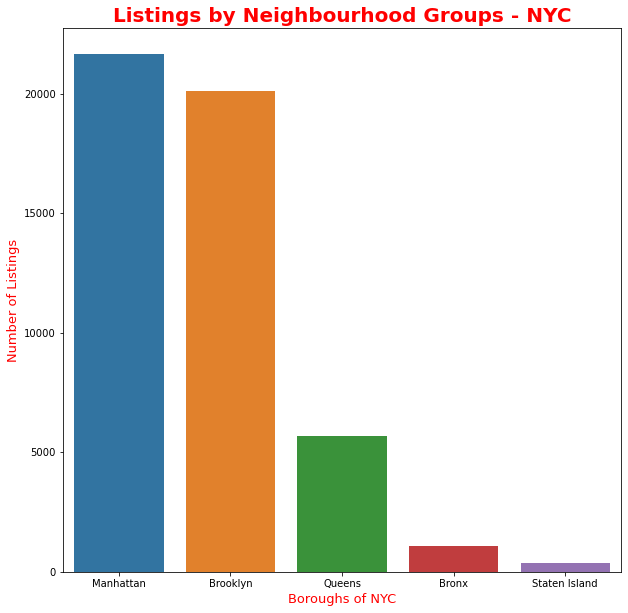

In [9]:
sns.countplot(nyc['neighbourhood_group'], order=nyc['neighbourhood_group'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xlabel("Boroughs of NYC",color='r',fontsize=13)
plt.ylabel("Number of Listings",color='r',fontsize=13)
plt.title('Listings by Neighbourhood Groups - NYC',color='r',fontsize='20',fontweight='bold')

### Average Price of Listings in Top 5 LGAs

In [11]:
avg_by_lga = syd.groupby(['neighbourhood_group']).mean()
avg_price_by_lga_sorted= avg_by_lga['price'].sort_values(ascending=False)
avg_price_by_lga_sorted

neighbourhood_group
Northern Beaches             363.200215
Lower North                  260.580197
Airport & Botany Bay         243.259587
Eastern Suburbs              239.481293
Central Business District    209.783533
Inner West                   174.374062
Paramatta                    164.627329
South                        153.884244
Upper North                  145.666213
Greater Western - North      138.263556
Greater Western - South      125.763855
Canterbury - Bankstown        96.740000
Name: price, dtype: float64

In [12]:
avg_price_by_lga_sorted_values = avg_price_by_lga_sorted[0:5]
avg_price_by_lga_sorted_values

neighbourhood_group
Northern Beaches             363.200215
Lower North                  260.580197
Airport & Botany Bay         243.259587
Eastern Suburbs              239.481293
Central Business District    209.783533
Name: price, dtype: float64

In [13]:
avg_price_lga_index = avg_price_by_lga_sorted_values.index
avg_price_lga_index

Index(['Northern Beaches', 'Lower North', 'Airport & Botany Bay',
       'Eastern Suburbs', 'Central Business District'],
      dtype='object', name='neighbourhood_group')

(0.0, 400.0)

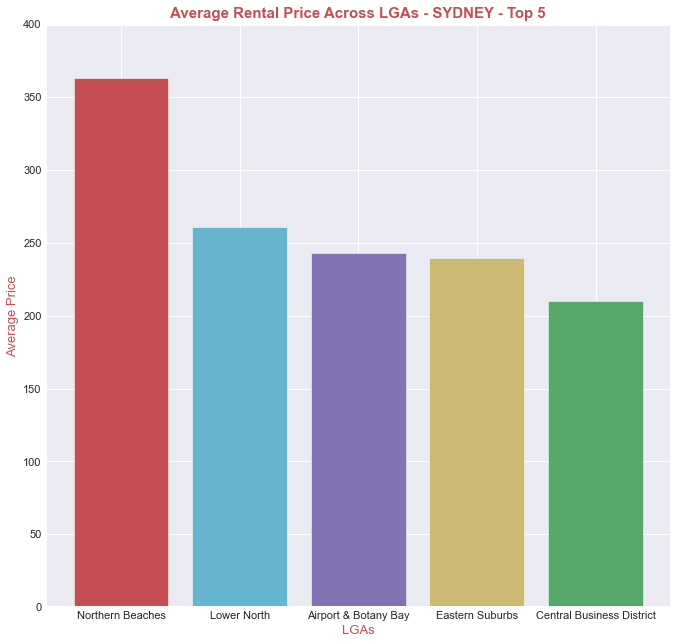

In [73]:
avg_price_syd = plt.bar(x=avg_price_lga_index, height=avg_price_by_lga_sorted_values, color=['r','c','m','y','g'])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Average Rental Price Across LGAs - SYDNEY - Top 5',color='r',fontsize=15,fontweight='bold')
plt.xlabel('LGAs',color='r',fontsize=13)
plt.ylabel('Average Price',color='r',fontsize=13)
plt.ylim(0,400)

In [14]:
avg_by_nyc = nyc.groupby(['neighbourhood_group']).mean()
avg_price_by_nyc_sorted= avg_by_nyc['price'].sort_values(ascending=False)
avg_price_by_nyc_sorted
avg_price_by_nyc_sorted_values = avg_price_by_nyc_sorted[0:5]
avg_price_by_nyc_sorted_values
avg_price_nyc_index = avg_price_by_nyc_sorted_values.index
avg_price_nyc_index

Index(['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx'], dtype='object', name='neighbourhood_group')

(0.0, 400.0)

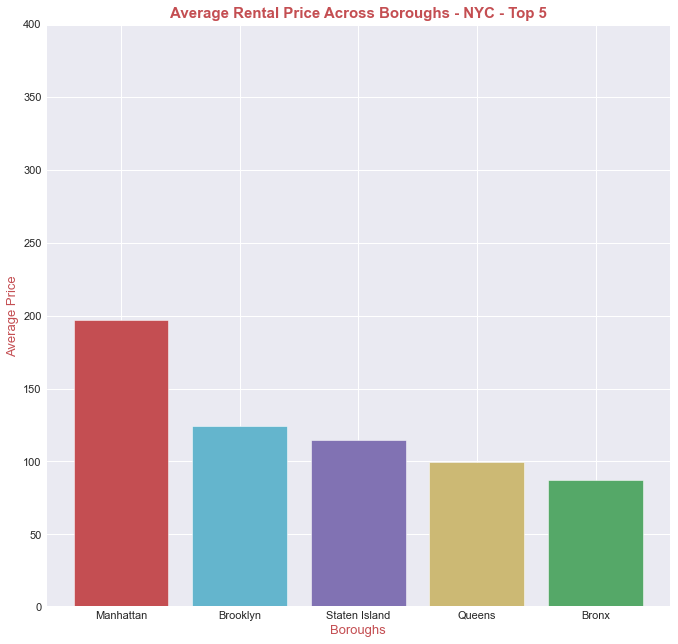

In [49]:
plt.bar(x=avg_price_nyc_index, height=avg_price_by_nyc_sorted_values, color=['r','c','m','y','g'])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Average Rental Price Across Boroughs - NYC - Top 5',color='r',fontsize=15,fontweight='bold')
plt.xlabel('Boroughs',color='r',fontsize=13)
plt.ylabel('Average Price',color='r',fontsize=13)
plt.ylim(0,400)

Since the NYC dataset is priced in USD and the Sydney dataset is priced in AUD, I decided to create a normalised bar chart for the NYC average prices.

In [15]:
avg_by_nyc = nyc.groupby(['neighbourhood_group']).mean()
avg_aud = (avg_by_nyc['price']*1.39)# Current exchange rate as of 16/08/20
avg_aud
avg_price_nyc_index = avg_aud.index
avg_price_nyc_index

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

(0.0, 400.0)

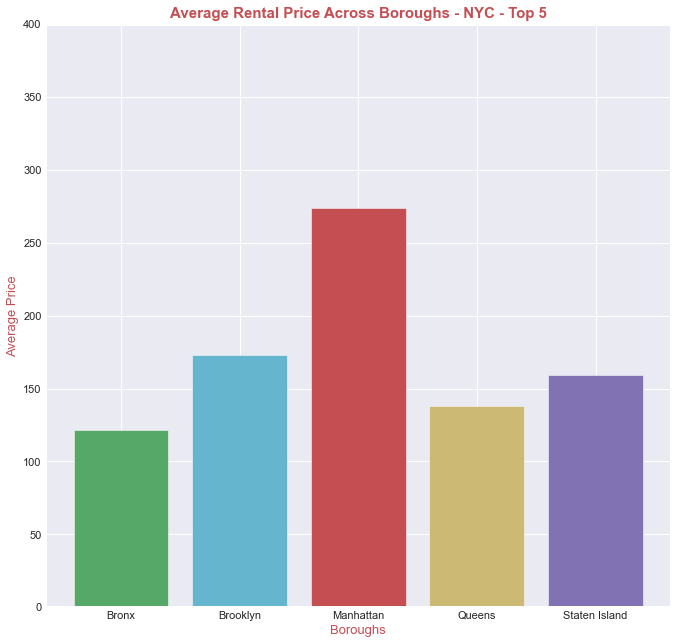

In [101]:
avg_price_nyc = plt.bar(x=avg_price_nyc_index, height=avg_aud, color=['g','c','r','y','m'])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Average Rental Price Across Boroughs - NYC - Top 5',color='r',fontsize=15,fontweight='bold')
plt.xlabel('Boroughs',color='r',fontsize=13)
plt.ylabel('Average Price',color='r',fontsize=13)
plt.ylim(0,400)

Even after normalising the data roughly, Sydneys most expensive LGA on average is pricier than Manhattans average!

Text(0, 0.5, 'Listings')

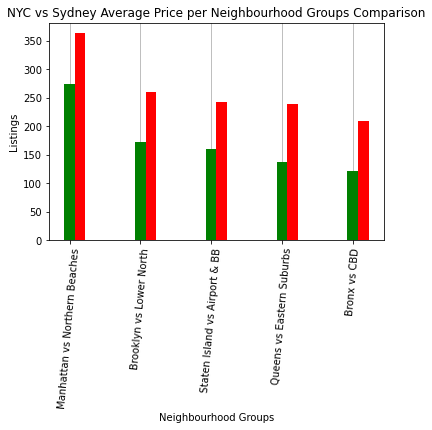

In [18]:
nyc_avg = [273.657381, 172.892658, 159.589142, 138.329532, 121.620541]
syd_avg = avg_price_by_lga_sorted_values
x = np.arange(len(nyc_avg))
bar_width = 0.15
plt.bar(x, nyc_avg, width=bar_width, color='green', zorder=2)
plt.bar(x + bar_width, syd_avg, width=bar_width, color='red', zorder=2)
plt.xticks(x ,['Manhattan vs Northern Beaches','Brooklyn vs Lower North', 'Staten Island vs Airport & BB', 'Queens vs Eastern Suburbs', 'Bronx vs CBD'], rotation=85)
plt.grid(axis='x')
plt.title('NYC vs Sydney Average Price per Neighbourhood Groups Comparison')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Listings')

# Top Neighbourhoods

In [19]:
# count the number of values
neighbourhood_count = syd['neighbourhood'].value_counts()

In [20]:
# take the top 10 neighbourhoods
top_neighbourhood_values = neighbourhood_count[0:10]
top_neighbourhood_values

Sydney          9364
Waverley        5024
Randwick        3275
Warringah       1767
Manly           1731
Woollahra       1510
North Sydney    1337
Marrickville    1214
Pittwater       1162
Rockdale         908
Name: neighbourhood, dtype: int64

In [21]:
top_neighbourhood_index = top_neighbourhood_values[0:10].index
top_neighbourhood_index

Index(['Sydney', 'Waverley', 'Randwick', 'Warringah', 'Manly', 'Woollahra',
       'North Sydney', 'Marrickville', 'Pittwater', 'Rockdale'],
      dtype='object')

Text(0.5, 0, 'Neighbourhood')

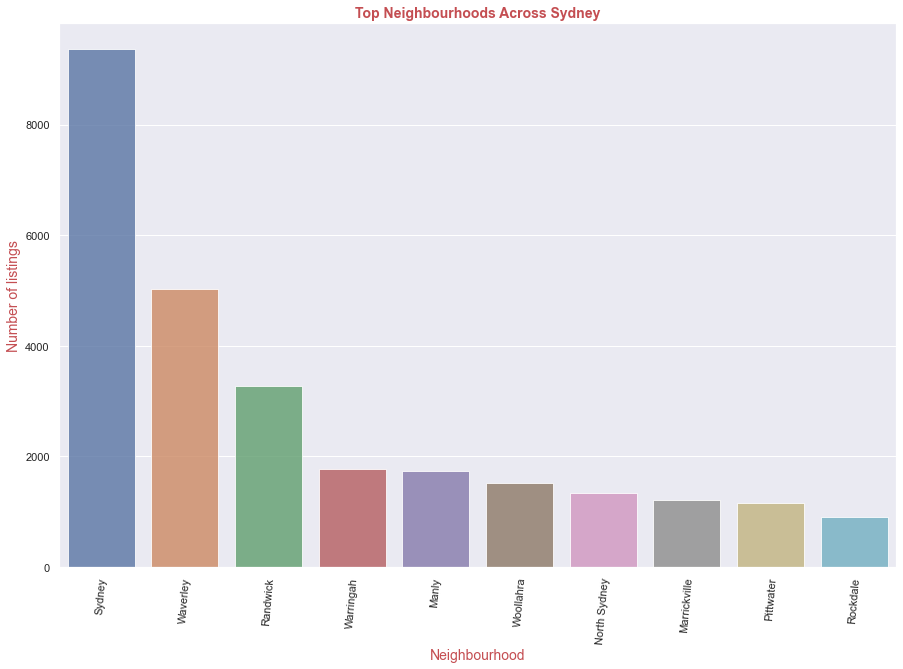

In [19]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15,10)})
neighbourhood_chart = sns.barplot(y=top_neighbourhood_values,x=top_neighbourhood_index,order=top_neighbourhood_index,alpha=.8)
neighbourhood_chart.set_xticklabels(neighbourhood_chart.get_xticklabels(), rotation=85)
neighbourhood_chart.set_title('Top Neighbourhoods Across Sydney',color='r',fontsize=14,fontweight='bold')
neighbourhood_chart.set_ylabel('Number of listings',color='r',fontsize=14)
neighbourhood_chart.set_xlabel('Neighbourhood',color='r',fontsize=14)

## Comparison of availability and price

Text(0.5, 1.0, 'Price of Listings')

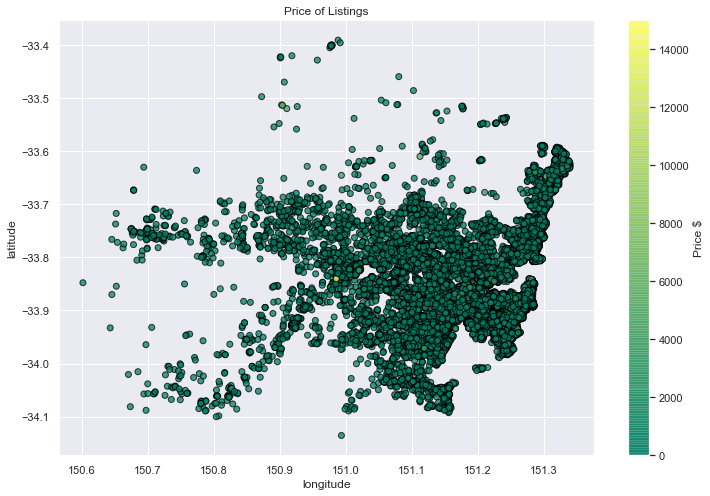

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(syd.longitude, syd.latitude, c=syd.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar = plt.colorbar()
cbar.set_label('Price $')
plt.title('Price of Listings')


## Most Expensive Listing in Sydney - 15K a night!!!
Whoever this host is, she should be arrested because no one would pay 15k for this room lol
![listing webpage](15k.png)
![listing image2](15k_1.jpg)
![listing image1](15k_2.jpg)

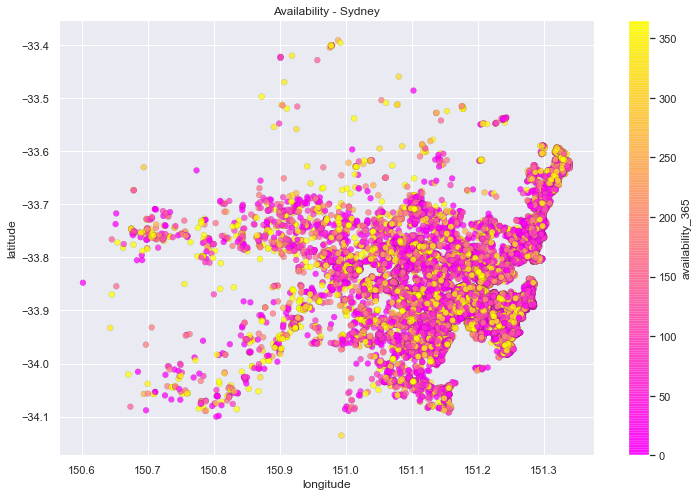

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(syd.longitude, syd.latitude, c=syd.availability_365, cmap='spring', edgecolor='black', linewidth=0.1, alpha=0.75)
cbar = plt.colorbar()
plt.title('Availability - Sydney')
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar.set_label('availability_365')

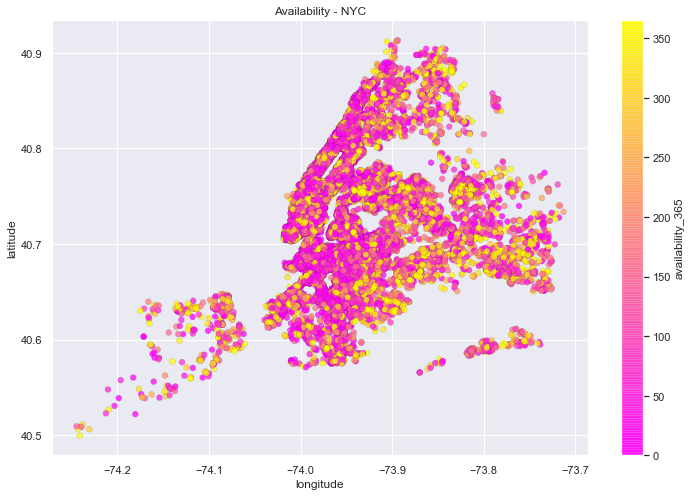

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(nyc.longitude, nyc.latitude, c=nyc.availability_365, cmap='spring', edgecolor='black', linewidth=0.1, alpha=0.75)
cbar = plt.colorbar()
plt.title('Availability - NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar.set_label('availability_365')

[Text(0, 0, 'Central Business District'),
 Text(0, 0, 'Northern Beaches'),
 Text(0, 0, 'Lower North'),
 Text(0, 0, 'Eastern Suburbs'),
 Text(0, 0, 'Inner West'),
 Text(0, 0, 'Upper North'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Greater Western - North'),
 Text(0, 0, 'Paramatta'),
 Text(0, 0, 'Canterbury - Bankstown'),
 Text(0, 0, 'Airport & Botany Bay'),
 Text(0, 0, 'Greater Western - South')]

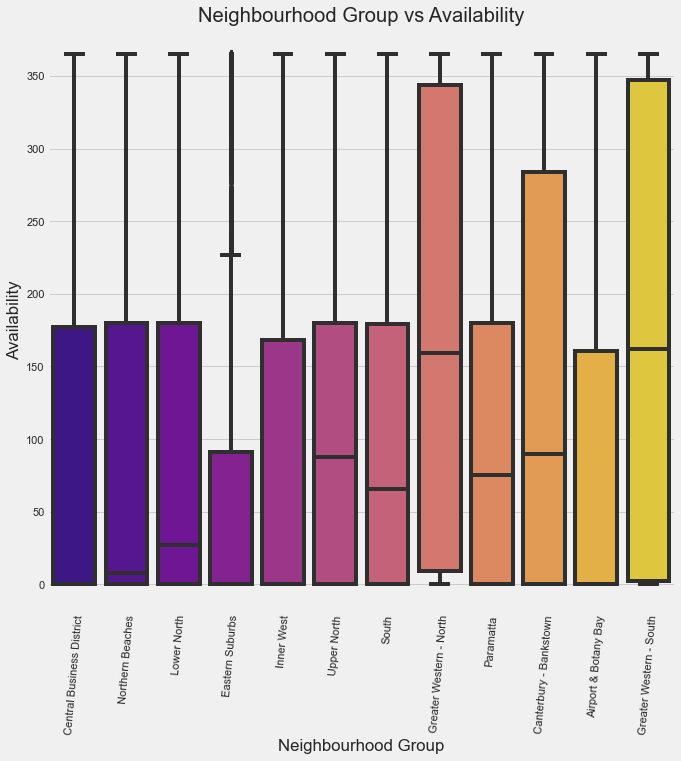

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=syd, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability')
plt.title('Neighbourhood Group vs Availability')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)

Text(0.5, 1.0, 'Scatter of Price distribution')

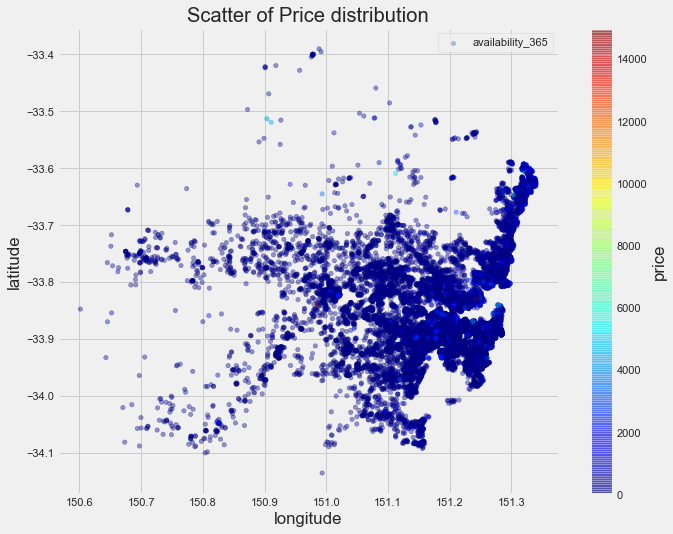

In [25]:
syd.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.title('Scatter of Price distribution')            

Text(0.5, 1.0, 'Scatter of Price distribution (Under 500)')

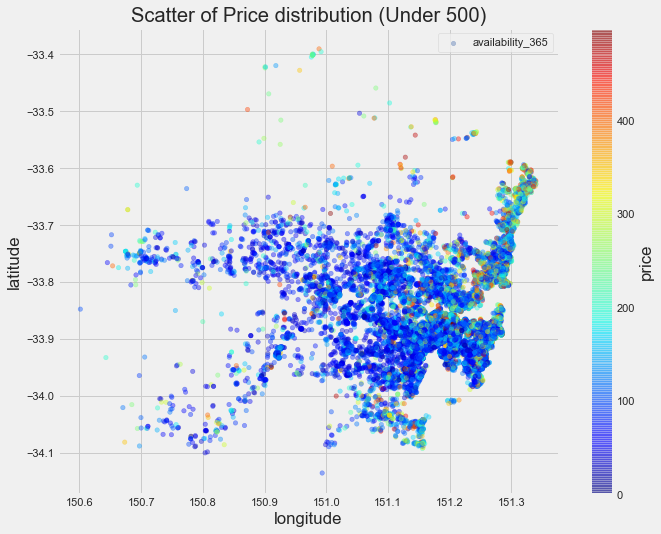

In [26]:
syd_under_500 = syd[syd.price < 500]
syd_under_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.title('Scatter of Price distribution (Under 500)')

Text(0.5, 1.0, 'Scatter - Price distribution (Over 500)')

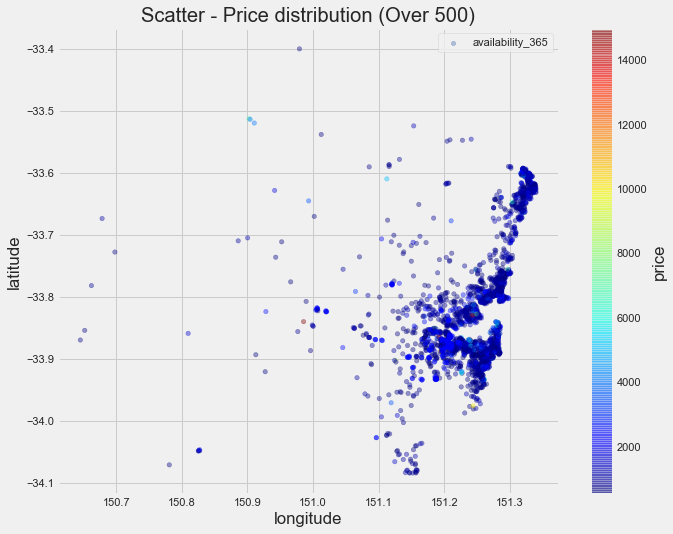

In [27]:
syd_500 = syd[syd.price > 500]
syd_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.title('Scatter - Price distribution (Over 500)')

Text(0.5, 1.0, 'Price vs Availability (NYC Over 500)')

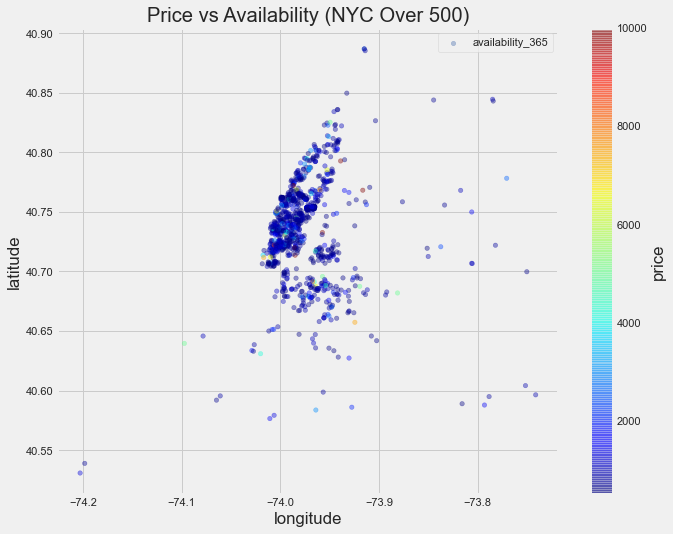

In [28]:
price_plot_nyc_500 = nyc[nyc.price > 500]
price_plot_nyc_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.title('Price vs Availability (NYC Over 500)')

## Mapping of Prices in NYC
I will use a geojson file to map out NYC price distribution between boroughs

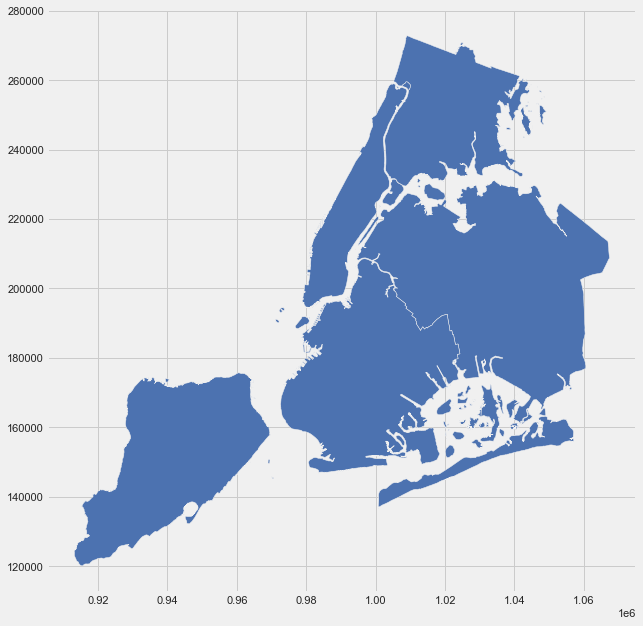

In [29]:
# read the geojson file using geopandas 
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))
# plot an empty map to see outline
nyc_map.plot()

In [30]:
# Examine geopandas file
nyc_map.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [31]:
# Count the number of listings 
neighbourhood_group_count = nyc.groupby('neighbourhood_group').agg('count').reset_index()
neighbourhood_group_count

,neighbourhood_group,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
1,Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
2,Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
3,Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
4,Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


In [33]:
# Rename columns so the files can be merged
nyc_map.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)
merged_nyc = nyc_map.merge(neighbourhood_group_count, on='neighbourhood_group')

(905464.739038086, 1075092.8783935548, 112485.76063504723, 280480.41425942676)

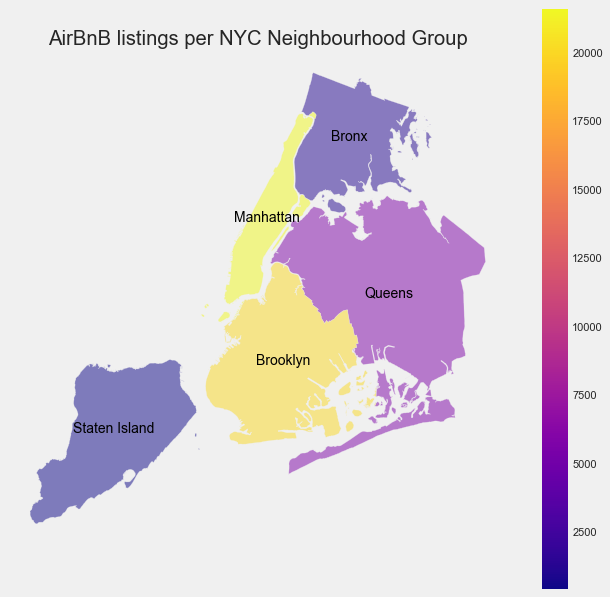

In [34]:
# plotting of listings map
fig,ax = plt.subplots(1,1, figsize=(10,10))
merged_nyc.plot(column='id', cmap='plasma', alpha=.5, ax=ax, legend=True)
merged_nyc.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("AirBnB listings per NYC Neighbourhood Group")
plt.axis('off')

In [35]:
# Here I am using folium to plot an interactive heatmap. This shows more indepth where the most listings lie in Sydney
import folium
from folium.plugins import HeatMap
m=folium.Map([-33.8708, 151.2073],zoom_start=8)
HeatMap(syd[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

## Room type comparison
Shared rooms and hotel rooms seem to be unpopular listings for AirBnB places so I pulled up New York City's share of room type and it was quite similar with an unlikeablity for shared rooms and the data not even having any Hotel rooms to compare with Sydneys.

Text(0.5, 1.0, 'Airbnb Rentals by Room Type - SYDNEY')

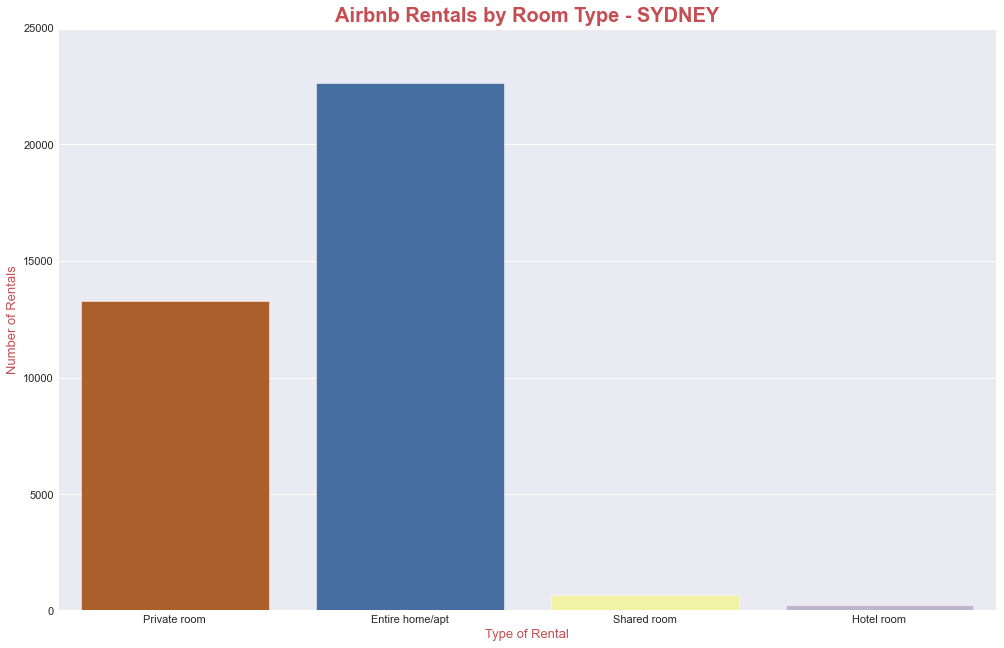

In [36]:
sns.set_style('darkgrid')
plt.ylim(0, 25000)
plt.xlim(0, None)
sns.countplot(x = syd['room_type'], palette="Accent_r")
plt.xlabel('Type of Rental',color='r',fontsize=13)
plt.ylabel('Number of Rentals',color='r',fontsize=13)
plt.title('Airbnb Rentals by Room Type - SYDNEY',color='r',fontsize='20',fontweight='bold')

Text(0.5, 1.0, 'Airbnb Rentals by Room Type - NEW YORK')

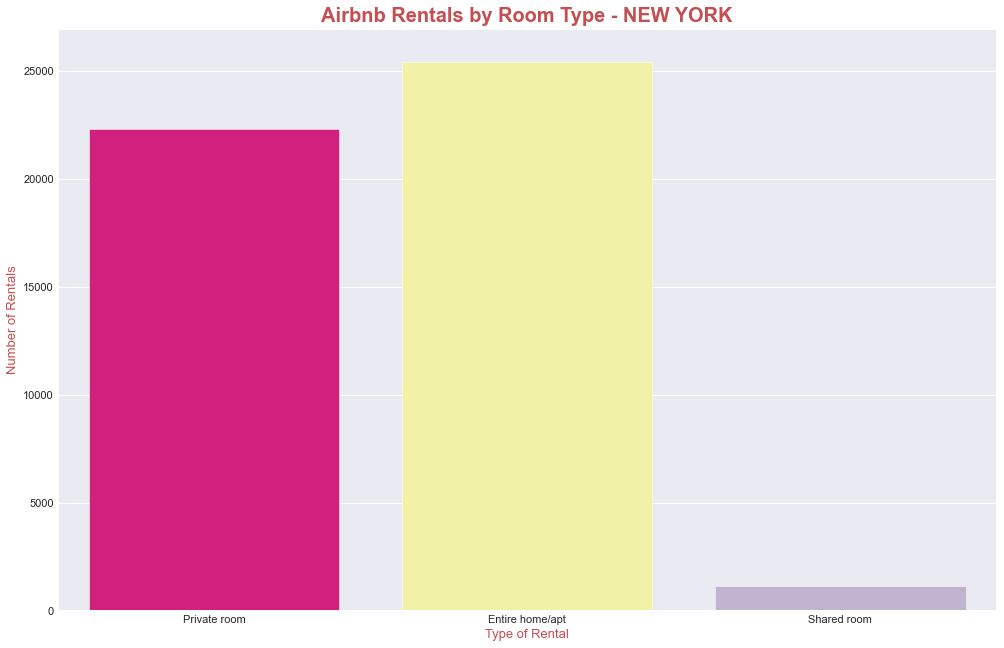

In [37]:
sns.set_style('darkgrid')
plt.ylim(0, 27000)
plt.xlim(0, None)
sns.countplot(x = nyc['room_type'], palette="Accent_r")
plt.xlabel('Type of Rental',color='r',fontsize=13)
plt.ylabel('Number of Rentals',color='r',fontsize=13)
plt.title('Airbnb Rentals by Room Type - NEW YORK',color='r',fontsize='20',fontweight='bold')

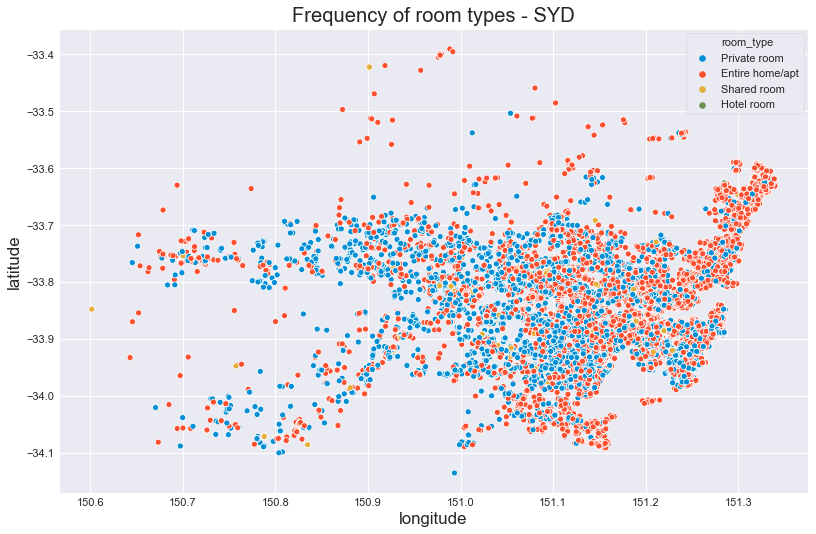

In [38]:
# plotting of room types in syd
plt.figure(figsize=(12,8))
sns.scatterplot(syd.longitude,syd.latitude,hue=syd.room_type)
plt.title("Frequency of room types - SYD")
plt.ioff()

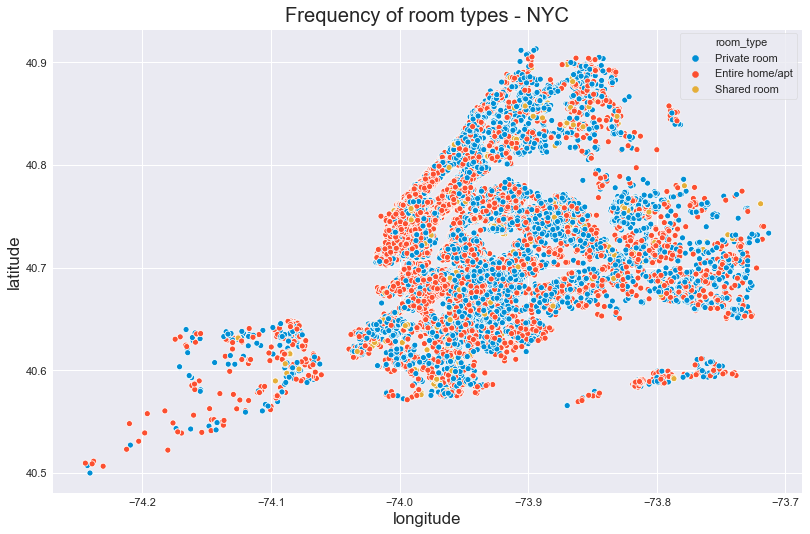

In [39]:
# plotting of room types in syd
plt.figure(figsize=(12,8))
sns.scatterplot(nyc.longitude,nyc.latitude,hue=nyc.room_type)
plt.title("Frequency of room types - NYC")
plt.ioff()

Conclusion

- Both cities have most of their listings near the city centres or around coastal areas.
- Price increases towards coastal areas or more urbanised areas
- Availability decreases towards coastal or more urbanised areas
- Entire houses/apartments top the listings in both cities
